# Real or Not NLP with Disaster Tweets
# Kaggle Challenge

[Link Kaggle to dataset](https://www.kaggle.com/c/nlp-getting-started)

# Installing some useful Libraries and API for this project

In [ ]:
!pip install --upgrade tensorflow-gpu
!pip install kaggle

In [ ]:
from google.colab import files
files.upload()

# Removing any warnings messages

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# Downloading dataset through Kaggle's API

In [ ]:
cd /root/

/root


In [ ]:
ls

In [ ]:
!mkdir .kaggle
!mv /content/kaggle.json /root/.kaggle/kaggle.json

In [ ]:
cd /root/.kaggle/

/root/.kaggle


In [ ]:
ls

kaggle.json


In [ ]:
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6
!kaggle -v

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json
!kaggle competitions download -p /content -c nlp-getting-started

  0% 0.00/593k [00:00<?, ?B/s]
100% 593k/593k [00:00<00:00, 96.8MB/s]


In [ ]:
cd /content/

/content


In [ ]:
ls

nlp-getting-started.zip  sample_data/


In [ ]:
!unzip nlp-getting-started.zip 

Archive:  nlp-getting-started.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


# Importing Libraries & Loading datasets

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import time
tf.__version__

'2.2.0'

In [ ]:
train_df = pd.read_csv('/content/train.csv')
test_df_kaggle = pd.read_csv('/content/test.csv')

In [ ]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
test_df_kaggle.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
train_df = train_df[['text', 'target']]
train_df.head()

,text,target
0,Our Deeds are the Reason of this #earthquake M...,1
1,Forest fire near La Ronge Sask. Canada,1
2,All residents asked to 'shelter in place' are ...,1
3,"13,000 people receive #wildfires evacuation or...",1
4,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
test_df_kaggle = test_df_kaggle[['id', 'text']]
test_df_kaggle.head()

,id,text
0,0,Just happened a terrible car crash
1,2,"Heard about #earthquake is different cities, s..."
2,3,"there is a forest fire at spot pond, geese are..."
3,9,Apocalypse lighting. #Spokane #wildfires
4,11,Typhoon Soudelor kills 28 in China and Taiwan


In [ ]:
target = pd.Series(tf.zeros_like(test_df_kaggle['id']).numpy())

In [ ]:
target = target.astype('int64', copy=False)

In [ ]:
test_df_kaggle['target'] = target
#pd.Series(tf.zeros_like(test_df_kaggle['id']).numpy())

In [ ]:
test_df_kaggle.head()

,id,text,target
0,0,Just happened a terrible car crash,0
1,2,"Heard about #earthquake is different cities, s...",0
2,3,"there is a forest fire at spot pond, geese are...",0
3,9,Apocalypse lighting. #Spokane #wildfires,0
4,11,Typhoon Soudelor kills 28 in China and Taiwan,0


In [ ]:
train_df.dtypes

text      object
target     int64
dtype: object

In [ ]:
test_df_kaggle.dtypes

id         int64
text      object
target     int64
dtype: object

In [ ]:
test_df_kaggle.head()

,id,text,target
0,0,Just happened a terrible car crash,0
1,2,"Heard about #earthquake is different cities, s...",0
2,3,"there is a forest fire at spot pond, geese are...",0
3,9,Apocalypse lighting. #Spokane #wildfires,0
4,11,Typhoon Soudelor kills 28 in China and Taiwan,0


# Data Viz

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


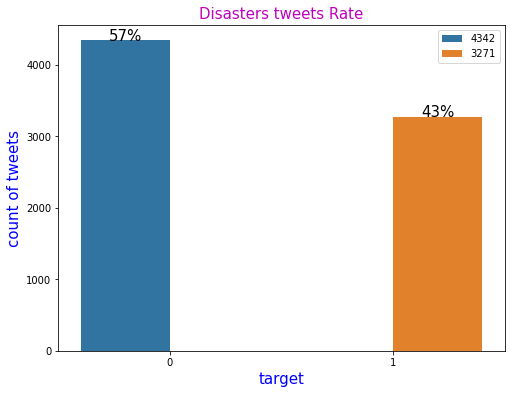

In [ ]:
fig, ax = plt.subplots(1, figsize=(8,6))
sns.countplot(data = train_df, x = 'target', hue='target', ax=ax)
plt.legend([index for index in train_df['target'].value_counts()])
plt.title('Disasters tweets Rate', fontsize=15, color='m')
plt.xlabel('target', fontsize=15, color='b')
plt.ylabel('count of tweets', fontsize=15, color='b')
for z in range(1):
    for p in ax.patches:
      total = float(len(train_df))
      height = p.get_height()
      ax.text(p.get_x()+p.get_width()/2.,
      height + 3, '{0:.0%}'.format(height/total), ha="center", fontsize=15)
plt.show()


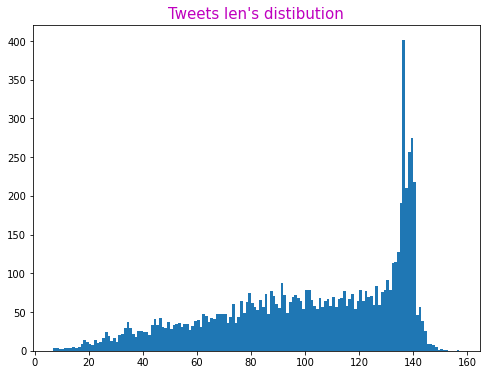

In [ ]:
fig, ax = plt.subplots(figsize=(8,6))
ax.hist(train_df['text'].str.len(), bins=150)
plt.title("Tweets len's distibution", fontsize=15, color='m')
plt.show()

# Data Preprocessing

#### Defining **text_processing function** for finding and removing any special characters in tweets

In [ ]:
!pip install emoji

In [ ]:
import emoji

#does the text contain an emoji?
def text_has_emoji(text):
    for character in text:
        if character in emoji.UNICODE_EMOJI:
            return True
    return False
#remove the emoji
def deEmojify(inputString):
    return inputString.encode('ascii', 'ignore').decode('ascii')

In [ ]:
import string
punct =[]
punct += list(string.punctuation)
punct += '’'
punct.remove("'")
def remove_punctuations(text):
    for punctuation in punct:
        text = text.replace(punctuation, ' ')
    return text

In [ ]:
def text_processing(df):
  
    # lowercase everything
    df['text'] = df['text'].apply(lambda x: x.lower())
    # get rid of '\n' from whitespace 
    df['text'] = df['text'].apply(lambda x: x.replace('\n', ' '))
    # regex remove hyperlinks
    df['text'] = df['text'].str.replace('http\S+|www.\S+', '', case=False)
    # removing '&gt;'
    df['text'] = df['text'].apply(lambda x: x.replace('&gt;', ''))
    # Removing Emojis from tokens
    df['text'] = df['text'].apply(lambda x: deEmojify(x))
    # remove punctuations
    df['text'] = df['text'].apply(remove_punctuations)
    # remove ' s ' that was created after removing punctuations
    df['text'] = df['text'].apply(lambda x: str(x).replace(" s ", " "))
    
    return df

#### Appling text_processing function on datasets

In [ ]:
train_df = text_processing(train_df)
test_df_kaggle = text_processing(test_df_kaggle)

In [ ]:
train_df.head()

,text,target
0,our deeds are the reason of this earthquake m...,1
1,forest fire near la ronge sask canada,1
2,all residents asked to 'shelter in place' are ...,1
3,13 000 people receive wildfires evacuation or...,1
4,just got sent this photo from ruby alaska as ...,1


In [ ]:
test_df_kaggle.head()

,id,text,target
0,0,just happened a terrible car crash,0
1,2,heard about earthquake is different cities s...,0
2,3,there is a forest fire at spot pond geese are...,0
3,9,apocalypse lighting spokane wildfires,0
4,11,typhoon soudelor kills 28 in china and taiwan,0


#### Removing further special characters with Regular Expression's Operations Library

In [ ]:
import re
train_df['text'] = train_df['text'].apply(lambda x: re.sub('[^a-zA-z\s]', '', x))
test_df_kaggle['text'] = test_df_kaggle['text'].apply(lambda x: re.sub('[^a-zA-z\s]', '', x))

In [ ]:
train_df.head()

,text,target
0,our deeds are the reason of this earthquake m...,1
1,forest fire near la ronge sask canada,1
2,all residents asked to shelter in place are be...,1
3,people receive wildfires evacuation orders ...,1
4,just got sent this photo from ruby alaska as ...,1


In [ ]:
test_df_kaggle.head()

,id,text,target
0,0,just happened a terrible car crash,0
1,2,heard about earthquake is different cities s...,0
2,3,there is a forest fire at spot pond geese are...,0
3,9,apocalypse lighting spokane wildfires,0
4,11,typhoon soudelor kills in china and taiwan,0


#### Creating Tensorflow datasets

In [ ]:
# Création d'un tf dataset à partir de pandas 
train_tf = tf.data.Dataset.from_tensor_slices((train_df['text'].values, train_df['target'].values))
test_tf_kaggle = tf.data.Dataset.from_tensor_slices((test_df_kaggle['text'].values, test_df_kaggle['target'].values))

#### Shuffle le dataset for prevent overfitting

In [ ]:
train_tf = train_tf.shuffle(50000)
test_tf_kaggle = test_tf_kaggle.shuffle(50000) 

In [ ]:
for example, target in train_tf.take(1):
  print(example.numpy(), target.numpy())

print()

#for exemple in test_tf_kaggle.take(1):
#  print(exemple.numpy())

for example, target in test_tf_kaggle.take(1):
  print(example.numpy(), target.numpy())


b'new doco tonight at pm setanta sports ireland freeview  the largest police presence at a soccer game in ireland stop prevent the rioting' 0

b'photo  no need to put your all your feelings on social media the results could be fatal   message ' 0


#### Spacy

In [ ]:
# Chargement des langages français et anglais de spacy 
!python -m spacy download en_core_web_md

In [ ]:
import en_core_web_md
nlp = en_core_web_md.load()

#### Création d'un corpus de Text pour les données d'entrainnement

In [ ]:
corpus_train = " ".join(train_df['text'].to_list())
corpus_train= corpus_train.strip().encode("utf-8").decode("utf-8")
corpus_train

#### Création d'un corpus de Text pour les données de test

In [ ]:
corpus_test_kaggle = " ".join(test_df_kaggle['text'].to_list())
corpus_test_kaggle= corpus_test_kaggle.strip().encode("utf-8").decode("utf-8")
corpus_test_kaggle

In [ ]:
%%time
import time
nlp.max_length = len(corpus_train)
train_nlp = nlp(corpus_train)
test_kaggle_nlp = nlp(corpus_test_kaggle)

CPU times: user 22.5 s, sys: 1.69 s, total: 24.2 s
Wall time: 24.2 s


#### Visualisation des nuages de mots les plus pertinents

In [ ]:
# Import Stop words 
from spacy.lang.en.stop_words import STOP_WORDS

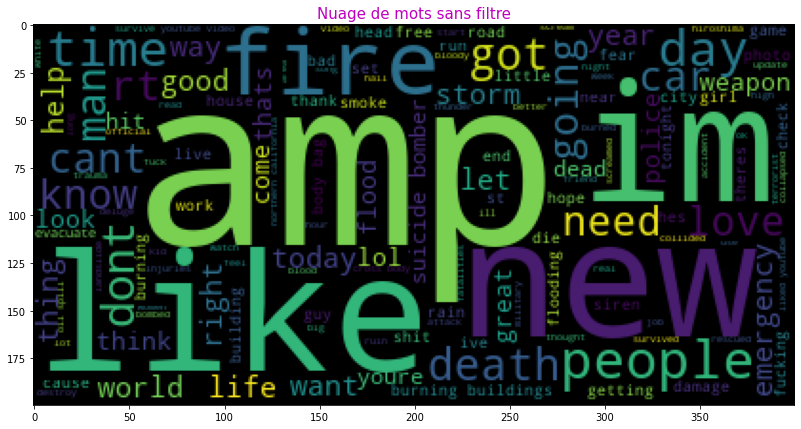

In [ ]:
from wordcloud import  WordCloud
fig, ax = plt.subplots(figsize=(20,7))
wd = WordCloud( stopwords=STOP_WORDS)
cloud = wd.generate(train_nlp.text)
ax.imshow(cloud)
plt.title("Nuage de mots sans filtre", fontsize=15, color='m')
plt.show()

#### Removing any meanless word in tweets with Spacy **STOP_WORDS**

#### Adding custom STOP_WORDS

In [ ]:
STOP_WORDS.add('PRON')
STOP_WORDS.add('amp')
STOP_WORDS.add('like')
STOP_WORDS.add('im')

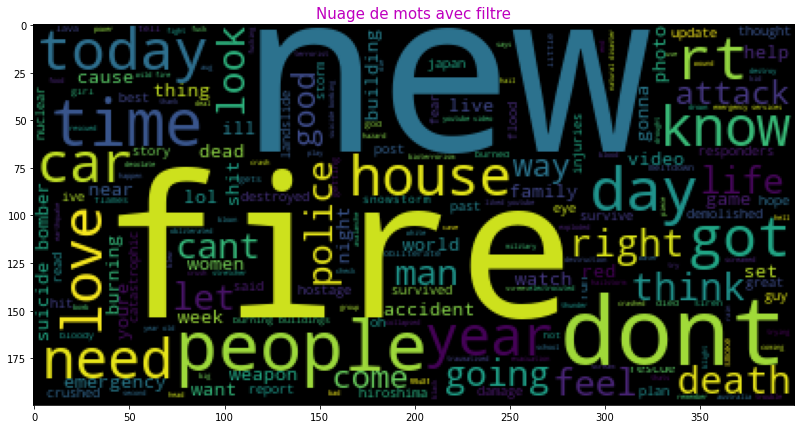

In [ ]:
fig, ax = plt.subplots(figsize=(20,7))
from wordcloud import  WordCloud
wd = WordCloud( stopwords=STOP_WORDS)
cloud = wd.generate(test_kaggle_nlp.text)
ax.imshow(cloud)
plt.title("Nuage de mots avec filtre", fontsize=15, color='m')
plt.show()

#### Création d'un set() qui va prendre tous les tokens unique de notre corpus de texte du train_set

In [ ]:
# Nous allons par la suite appliquer les mêmes paramètres au test_set 
%%time
tokens_train = [token.lemma_ for token in train_nlp if token.text not in STOP_WORDS]
vocabulary_set_train= set(tokens_train)
vocab_size_train = len(vocabulary_set_train)
print('vocabulary_size_train : ', vocab_size_train)

vocabulary_size_train :  14060
CPU times: user 211 ms, sys: 2.98 ms, total: 214 ms
Wall time: 216 ms


#### Création d'un nombre pour chacun des tokens du train

In [ ]:
encoder_train = tfds.features.text.TokenTextEncoder(vocabulary_set_train)
print(encoder_train.vocab_size)

14062


- Regardons le résultat sur un exemple sur le train

In [ ]:
for example, target in train_tf.take(1):
  print(encoder_train.encode(example.numpy()))
  print(example.numpy())
  print(target.numpy())

[5285, 2138, 2346, 14061, 7138, 11006, 14061, 14061, 1882, 1643]
b' pft barkevious mingo missed browns practice with a mystery injury '
0


- Regardons le résultat sur un exemple sur le test

In [ ]:
for example, target in test_tf_kaggle.take(1):
  print(encoder_train.encode(example.numpy()))
  print(example.numpy())
  print(target.numpy())

[14061, 14061, 14061, 241, 2000, 14061, 14061]
b'this is gonna go down in flames    '
0


#### Encodage des tweets

In [ ]:
# Encodons maintenant tous les éléments du dataset train
def encode_train(text_tf, label):
  encoded_text = encoder_train.encode(text_tf.numpy())
  return encoded_text, label

# Utilisation de la py_function pour encoder tout le dataset 
def encode_map_fn(text, label):
  return tf.py_function(encode_train, inp=[text, label], Tout=(tf.int64, tf.int64))

all_encoded_train_data = train_tf.map(encode_map_fn)

In [ ]:
for exemple, target in all_encoded_train_data.take(1):
  print(exemple.numpy(), target.numpy())

[ 8026 14061  5447 12961  6215 14061 14061 13905] 1


In [ ]:
all_encoded_test_data = test_tf_kaggle.map(encode_map_fn)

In [ ]:
for exemple, target in all_encoded_test_data.take(1):
  print(exemple.numpy())
  print(target.numpy())

[11577 14061 14061  2210  3609 14061 14061 12703 14061 14061  8782 14061
 13256  2210 14061  8782 14061 14061 14061 14061 13160]
0


#### Train Test Split & Padding par Batch

In [ ]:
TAKE_SIZE = int(0.75*train_df.shape[0])

train_data = all_encoded_train_data.take(TAKE_SIZE).shuffle(50000)
train_data = train_data.padded_batch(16,  padded_shapes=([-1], []))

test_data = all_encoded_train_data.skip(TAKE_SIZE)
test_data = test_data.padded_batch(16, padded_shapes=([-1], []))

test_kaggle = all_encoded_test_data.shuffle(50000)
test_kaggle = test_kaggle.padded_batch(16,  padded_shapes=([-1], []))


#### Regardons un batch 

In [ ]:
for tweet, target in test_kaggle.take(1):
  print(tweet, target)

tf.Tensor(
[[ 4377 14061 14061 14061 14061 14061  3723  6549     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0]
 [ 3532  2681  8364 14061  6126 11494  9239  8230 14061  9796 11347 14061
   7852 14061     0     0     0     0     0     0     0     0     0     0]
 [13669 10303 14061  6399  5929 11783 14061 11246 14061  5025  4214  7717
   3359  3499  8264     0     0     0     0     0     0     0     0     0]
 [ 2648  2025 14061 14061 14061 14061 13635     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0]
 [ 9799 11752 14061  6291 14061  7516 14061 14061 12703  7164  3193  9111
   7310  2869 11417  8479 14061 14061 14061     0     0     0     0     0]
 [ 3621 13741     0     0     0     0     0     0     0     0     0     0
      0     0     0     0     0     0     0     0     0     0     0     0]
 [14061  5814 14061 14061 11702 14061 14061 14061 14061 14061  9406 14061
  14061 14061 14061  

#Modelisation
Créons un modèle basé sur une couche LSTM pour classer nos différentes traductions

In [ ]:
model = tf.keras.Sequential([
                  # Couche d'Input Word Embedding           
                  tf.keras.layers.Embedding(encoder_train.vocab_size, 64),

                  # Couche LSTM Bidirectionnelle
                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),

                  # Couche CNN
                  tf.keras.layers.Conv1D(16, 3, activation="relu"),
                  
                  # Nouvelle couche LSTM Bidirectionnel
                  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64, return_sequences=True)),
                  # Nouvelle couche LSTM
                  tf.keras.layers.LSTM(32, return_sequences=False),               

                  # Couche Dense classique 
                  tf.keras.layers.Dense(64, activation='relu'),
                  tf.keras.layers.Dense(32, activation='relu'),
                  tf.keras.layers.Dense(16, activation='relu'),
                  tf.keras.layers.Dense(8, activation='relu'),

                  # Couche de sortie avec le nombre de neurones en sortie égale au nombre de classe avec fonction softmax
                  tf.keras.layers.Dense(6, activation="softmax")
                                              
])

#### Résumé du modèle

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 64)          899968    
_________________________________________________________________
bidirectional_2 (Bidirection (None, None, 128)         66048     
_________________________________________________________________
conv1d_1 (Conv1D)            (None, None, 16)          6160      
_________________________________________________________________
bidirectional_3 (Bidirection (None, None, 128)         41472     
_________________________________________________________________
lstm_5 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_6 (Dense)              (None, 32)               

#### Création d'un learning rate schedule

In [ ]:
# Créons un learning rate schedule pour décroitre le learning rate à mesure que nous entrainons le modèle 
initial_learning_rate = 0.0001

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=500,
    decay_rate=0.96,
    staircase=True)

#### Création d'un compileur

In [ ]:
# Utilisation d'un compileur simple avec un optimiseur Adam pour le calcul de nos gradients 
optimizer= tf.keras.optimizers.Adam(
    learning_rate = lr_schedule
)

model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=[tf.keras.metrics.SparseCategoricalAccuracy()])

#### Choix de la Balance des classes

In [ ]:
class_weight = {
    
    0:0.57,
    1:0.43
}

#### Entrainement du modèle 

In [ ]:
history = model.fit(train_data, 
                    epochs=100, 
                    validation_data=test_data,
                    class_weight=class_weight)

# Prédiction sur les tweets

In [ ]:
y_pred = []

for example, label in test_kaggle.take(len(test_df_kaggle)):
  #print(encoder_train.decode(example.numpy()[0]))
  y_pred.append(model.predict_classes(example)[0])
  #print("Real: {}".format(label[0]))

#model1 = {}
#for example, label in test_kaggle.take(len(test_df_kaggle)):
#  model1[example] = model.predict_classes(example)[0]

  #model1 = {
  #    'target': model.predict_classes(example)[0]
  #}

  #y_predictions = pd.DataFrame(columns=['target'],data=model1)
  #y_predictions.to_csv('Real_or_Not__NLP_with_Disaster_Tweets-model1.csv', index=False)


In [ ]:
test_df_kaggle=test_df_kaggle.drop(['target'], axis=1)

In [ ]:
test_df_kaggle.head()

,id,text
0,0,just happened a terrible car crash
1,2,heard about earthquake is different cities s...
2,3,there is a forest fire at spot pond geese are...
3,9,apocalypse lighting spokane wildfires
4,11,typhoon soudelor kills in china and taiwan


In [ ]:
target = pd.Series(y_pred)

In [ ]:
target.dtypes

dtype('int64')

In [ ]:
target = target.astype('int64', copy=False)

In [ ]:
test_df_kaggle['target']=target

In [ ]:
test_df_kaggle['target']=test_df_kaggle.target.apply(lambda x: str(x))

In [ ]:
test_df_kaggle['target']=test_df_kaggle.target.apply(lambda x: str(x[0:1]))

In [ ]:
test_df_kaggle['target']=test_df_kaggle.target.apply(lambda x: int(x=0))

In [ ]:
test_df_kaggle.dtypes

id         int64
text      object
target     int64
dtype: object

In [ ]:
test_df_kaggle.head()

,id,text,target
0,0,just happened a terrible car crash,0
1,2,heard about earthquake is different cities s...,0
2,3,there is a forest fire at spot pond geese are...,0
3,9,apocalypse lighting spokane wildfires,0
4,11,typhoon soudelor kills in china and taiwan,0


In [ ]:
#test_df_kaggle['target']=target
#test_df_kaggle = test_df_kaggle.drop(['text'], axis=1)
#test_df_kaggle.shape

In [ ]:
test_df_kaggle.to_csv('Real_or_Not__NLP_with_Disaster_Tweets-model1.csv', index=False)

#Evaluation du modèle

In [ ]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

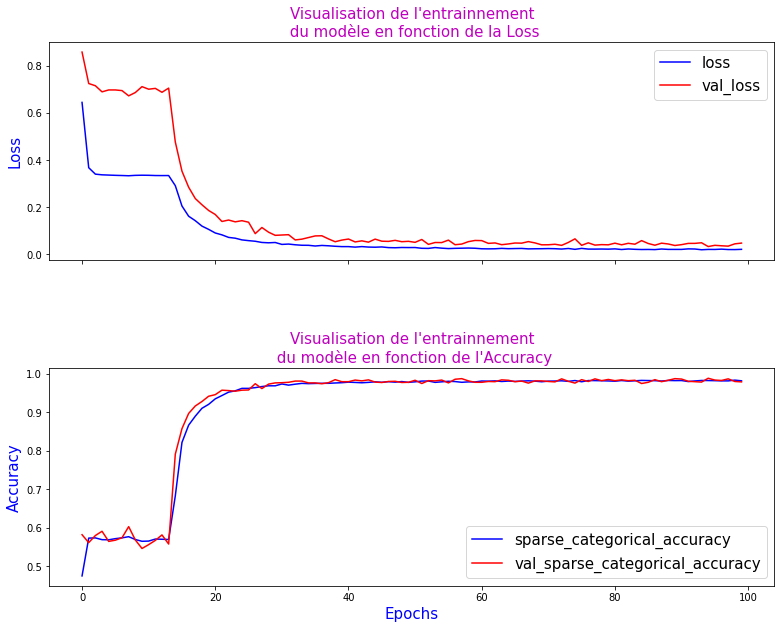

In [ ]:
fig, ax = plt.subplots(2, figsize=(13,10), constrained_layout=False, sharex=True)
fig.subplots_adjust(hspace=0.5, wspace=0.5)
plt.xlabel("Epochs", fontsize=15, color='b')

ax[0].plot(history.history["loss"], color="b")
ax[0].plot(history.history["val_loss"], color="r")
ax[0].set_ylabel("Loss", fontsize=15, color='b')
ax[0].set_title("Visualisation de l'entrainnement\n du modèle en fonction de la Loss", fontsize=15, color='m')
ax[0].legend([i for i in history.history.keys() if i=="loss" or i=="val_loss"],loc='upper right', bbox_to_anchor=(1,1), fontsize=15)

ax[1].plot(history.history["sparse_categorical_accuracy"], color="b")
ax[1].plot(history.history["val_sparse_categorical_accuracy"], color="r")
ax[1].set_title("Visualisation de l'entrainnement\n du modèle en fonction de l'Accuracy", fontsize=15, color='m')
ax[1].legend([i for i in history.history.keys() if i=="sparse_categorical_accuracy" or i=="val_sparse_categorical_accuracy"],loc='lower right', bbox_to_anchor=(1,0),fontsize=15)
ax[1].set_ylabel("Accuracy", fontsize=15, color='b')
plt.show()

#### Matrice de confusion